In [206]:
from cgi import test
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


netflix = pd.read_csv('./data/n_movies.csv', thousands=',')
cols_to_drop = ["year", "certificate",
                "duration", "genre", "stars", "description"]
# first five rows of dataframe after removing columns
netflix = netflix.drop(columns=cols_to_drop, axis=1)
netflix = netflix.dropna()
netflix["votes"] = netflix["votes"].astype(int)
netflix["rating"] = netflix["rating"].astype(float)
netflix["title"] = netflix["title"].astype(str)
netflix.head()
netflix.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8784 entries, 0 to 9956
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   8784 non-null   object 
 1   rating  8784 non-null   float64
 2   votes   8784 non-null   int32  
dtypes: float64(1), int32(1), object(1)
memory usage: 240.2+ KB


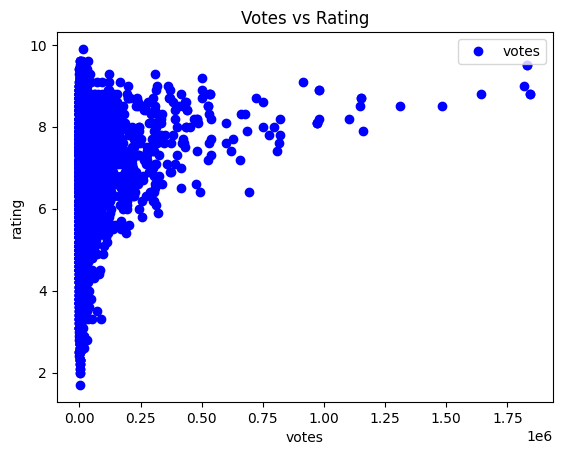

In [207]:
plt.title('Votes vs Rating')
plt.xlabel('votes')
plt.ylabel('rating')

plt.plot(netflix["votes"], netflix["rating"], 'o', color='blue')
#plt.plot(netflix["rating"], netflix["votes"]*0.0000175*0.3, 'o', color='red')
plt.legend(['votes'])
plt.show()

In [208]:
votes_avg = netflix['votes'].rolling(2).mean()
print(votes_avg)

0            NaN
1       188458.0
2       350634.5
3       255578.5
4        12593.0
          ...   
9952    917244.5
9953    486598.5
9954    584982.5
9955    319749.5
9956    224693.5
Name: votes, Length: 8784, dtype: float64


In [209]:
rating_avg = netflix['rating'].rolling(2).mean()
print(rating_avg)

0        NaN
1       8.60
2       8.80
3       7.40
4       7.25
        ... 
9952    7.90
9953    7.20
9954    8.40
9955    8.55
9956    7.15
Name: rating, Length: 8784, dtype: float64


In [210]:
rating_sd = netflix['rating'].rolling(2).std()
print(rating_sd)

0            NaN
1       0.141421
2       0.141421
3       2.121320
4       1.909188
          ...   
9952    2.262742
9953    1.272792
9954    0.424264
9955    0.212132
9956    1.767767
Name: rating, Length: 8784, dtype: float64


In [211]:
votes_sd = netflix['votes'].rolling(2).std()
print(votes_sd)

0                NaN
1       1.616022e+04
2       2.131920e+05
3       3.476215e+05
4       3.988082e+03
            ...     
9952    1.292753e+06
9953    6.837277e+05
9954    5.445917e+05
9955    1.694956e+05
9956    3.039251e+05
Name: votes, Length: 8784, dtype: float64


In [212]:
votes_rolling_difference = pd.Series(netflix['votes']).diff(periods=1)
print(votes_rolling_difference)

0             NaN
1         22854.0
2        301499.0
3       -491611.0
4          5640.0
          ...    
9952   -1828229.0
9953     966937.0
9954    -770169.0
9955     239703.0
9956    -429815.0
Name: votes, Length: 8784, dtype: float64


In [213]:
rating_rolling_difference = pd.Series(netflix['rating']).diff(periods=1)
print(rating_rolling_difference)

0       NaN
1       0.2
2       0.2
3      -3.0
4       2.7
       ... 
9952   -3.2
9953    1.8
9954    0.6
9955   -0.3
9956   -2.5
Name: rating, Length: 8784, dtype: float64


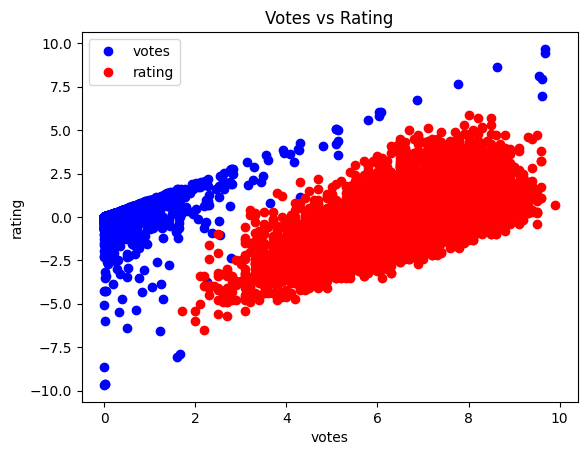

In [214]:
plt.title('Votes vs Rating')
plt.xlabel('votes')
plt.ylabel('rating')

plt.plot(netflix["votes"]*0.0000175*0.3, votes_rolling_difference*0.0000175*0.3, 'o', color='blue')
plt.plot(netflix["rating"], rating_rolling_difference, 'o', color='red')
plt.legend(['votes','rating'])
plt.show()

In [215]:
from sklearn.model_selection import train_test_split
X= netflix['votes']
Y= netflix['rating']
#Y = lab.fit_transform(Y)
print(Y)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.4,random_state=100)



0       8.5
1       8.7
2       8.9
3       5.9
4       8.6
       ... 
9952    6.3
9953    8.1
9954    8.7
9955    8.4
9956    5.9
Name: rating, Length: 8784, dtype: float64


In [216]:
small_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(1, )),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

small_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 1)                 0         
                                                                 
 dense_5 (Dense)             (None, 64)                128       
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [217]:
big_model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(1, )),
    tf.keras.layers.Dense(72, activation='relu'),
    tf.keras.layers.Dense(48, activation='relu'),
    tf.keras.layers.Dense(1)
])

big_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 1)                 0         
                                                                 
 dense_7 (Dense)             (None, 72)                144       
                                                                 
 dense_8 (Dense)             (None, 48)                3504      
                                                                 
 dense_9 (Dense)             (None, 1)                 49        
                                                                 
Total params: 3,697
Trainable params: 3,697
Non-trainable params: 0
_________________________________________________________________


In [218]:
small_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.MeanSquaredError()],
)

big_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.0001),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.MeanSquaredError()],
)

In [219]:
new_df = [ X_train, y_train]

In [220]:
small_model_history = small_model.fit(
    X_train.values, #input
    y_train.values, #output
    epochs=900,
    shuffle=True,
    validation_data=[X_test.values, y_test.values],
)

Epoch 1/900
165/165 [==============================] - 1s 2ms/step - loss: 124411960.0000 - mean_squared_error: 124411960.0000 - val_loss: 109247736.0000 - val_mean_squared_error: 109247736.0000
Epoch 2/900
165/165 [==============================] - 0s 2ms/step - loss: 37277976.0000 - mean_squared_error: 37277976.0000 - val_loss: 26292430.0000 - val_mean_squared_error: 26292430.0000
Epoch 3/900
165/165 [==============================] - 0s 2ms/step - loss: 8007410.5000 - mean_squared_error: 8007410.5000 - val_loss: 5193097.0000 - val_mean_squared_error: 5193097.0000
Epoch 4/900
165/165 [==============================] - 0s 1ms/step - loss: 1173517.2500 - mean_squared_error: 1173517.2500 - val_loss: 497102.2188 - val_mean_squared_error: 497102.2188
Epoch 5/900
165/165 [==============================] - 0s 1ms/step - loss: 115181.5859 - mean_squared_error: 115181.5859 - val_loss: 33833.2344 - val_mean_squared_error: 33833.2344
Epoch 6/900
165/165 [==============================] - 0s 1ms

In [221]:
big_model_history = big_model.fit(
    X_train.values, #input
    y_train.values, #output
    epochs=300,
    shuffle=True,
    validation_data=[X_test.values, y_test.values],
)

Epoch 1/300
165/165 [==============================] - 1s 2ms/step - loss: 1961506.0000 - mean_squared_error: 1961506.0000 - val_loss: 46.1690 - val_mean_squared_error: 46.1690
Epoch 2/300
165/165 [==============================] - 0s 2ms/step - loss: 45.5837 - mean_squared_error: 45.5837 - val_loss: 45.1257 - val_mean_squared_error: 45.1257
Epoch 3/300
165/165 [==============================] - 0s 2ms/step - loss: 45.2853 - mean_squared_error: 45.2853 - val_loss: 45.4906 - val_mean_squared_error: 45.4906
Epoch 4/300
165/165 [==============================] - 0s 2ms/step - loss: 45.2719 - mean_squared_error: 45.2719 - val_loss: 47.3612 - val_mean_squared_error: 47.3612
Epoch 5/300
165/165 [==============================] - 0s 2ms/step - loss: 45.3244 - mean_squared_error: 45.3244 - val_loss: 48.1302 - val_mean_squared_error: 48.1302
Epoch 6/300
165/165 [==============================] - 0s 2ms/step - loss: 44.7907 - mean_squared_error: 44.7907 - val_loss: 45.6470 - val_mean_squared_err

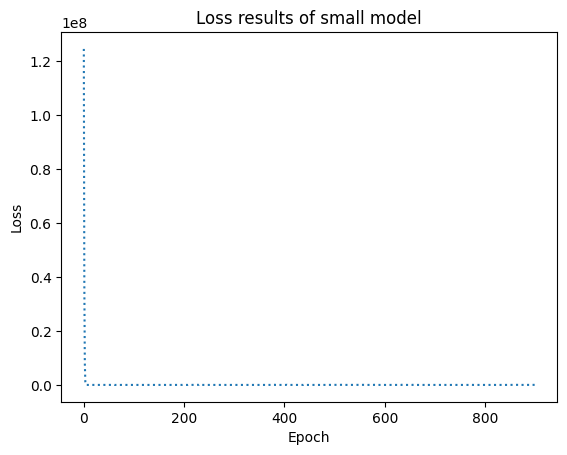

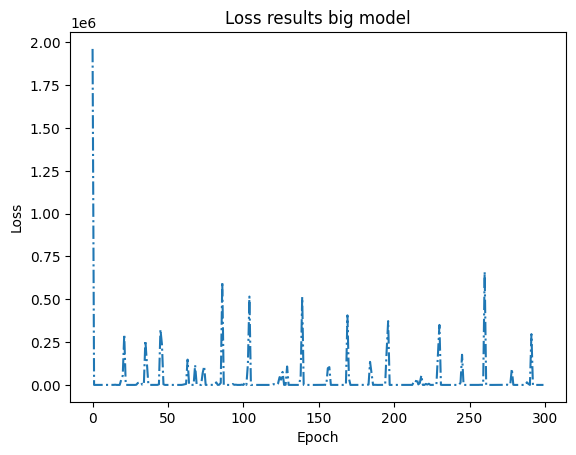

In [224]:
# Plot Loss Small modell vs big Modell 
plt.title('Loss results of small model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(small_model_history.history["loss"], linestyle='dotted')
plt.show()

# Plot Loss Small modell vs big Modell 
plt.title('Loss results big model')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(big_model_history.history["loss"], linestyle='dashdot')
plt.show()

In [222]:
print(X_test)
small_model.predict(X_test)

2825      1706
1308      9392
4899      2834
7260         9
3274      3811
         ...  
1069    112459
4551       759
3270      1132
4795       535
5714       131
Name: votes, Length: 3514, dtype: int32
110/110 [==============================] - 0s 723us/step


array([[ 9.564756 ],
       [22.236265 ],
       [11.424437 ],
       ...,
       [ 8.618422 ],
       [ 7.6341615],
       [ 6.968101 ]], dtype=float32)

In [223]:
print(X_test)
big_model.predict(X_test)

2825      1706
1308      9392
4899      2834
7260         9
3274      3811
         ...  
1069    112459
4551       759
3270      1132
4795       535
5714       131
Name: votes, Length: 3514, dtype: int32
110/110 [==============================] - 0s 740us/step


array([[4.2696147],
       [4.0256457],
       [4.2338557],
       ...,
       [4.2878394],
       [4.3067584],
       [4.248164 ]], dtype=float32)